# Harmonic oscillator numeric analysis
#### Marcomini Alessandro (2024286)

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

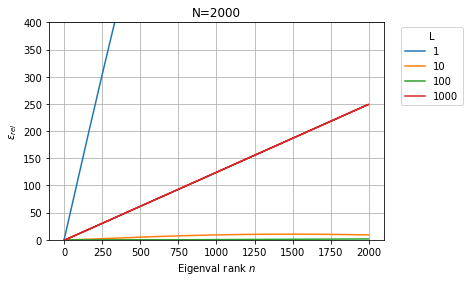

In [93]:
# Load data from output of FORTRAN program - varying L
Ls = [1,10,100,1000]

for L in Ls:
    eigenval = np.genfromtxt('/Users/ale/QuantumComputingStuff/Ex04_marcomini/data/Eigenvals_%.i.txt' % L)
    th_val = np.array([(n+0.5) for n in np.arange(2000)])*2
    plt.plot(np.abs(eigenval-th_val)/th_val, label=str(L))

plt.title('N=2000')
plt.legend(bbox_to_anchor=(1.25,1), title='L')
plt.ylabel('$\epsilon_{rel}$')
plt.xlabel('Eigenval rank $n$')
plt.grid()
plt.ylim([0,400])
plt.show()
    

<ipython-input-106-2f3a4ab09794>:16: UserWarning: Attempted to set non-positive right xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([1,-1])


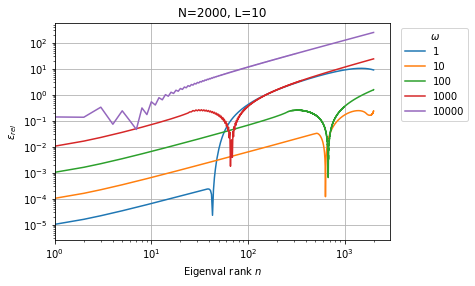

In [106]:
# Load data from output of FORTRAN program - varying omega
omegas = [1,10,100,1000,10000]

for omega in omegas:
    eigenval = np.genfromtxt('/Users/ale/QuantumComputingStuff/Ex04_marcomini/data/Eigenvals_omega_%.i.txt' % omega)
    th_val = omega*np.array([(n+0.5) for n in np.arange(2000)])*2
    plt.plot(np.abs(eigenval-th_val)/th_val, label=str(omega))

plt.title('N=2000, L=10')
plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.25,1), title='$\omega$')
plt.ylabel('$\epsilon_{rel}$')
plt.xlabel('Eigenval rank $n$')
plt.grid()
plt.xlim([1,-1])
plt.show()
    

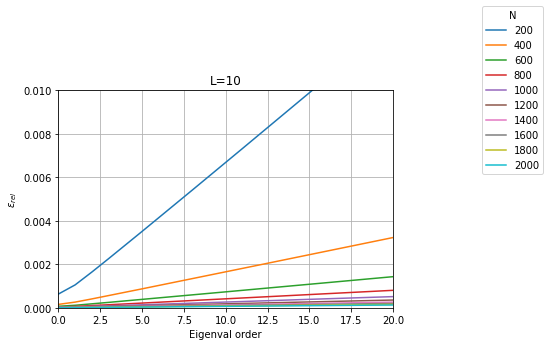

In [80]:
# Load data from output of FORTRAN program - varying N
Ns = [200,400,600,800,1000,1200,1400,1600,1800,2000]
eps_max = []
for N in Ns:
    eigenval = np.genfromtxt('/Users/ale/QuantumComputingStuff/Ex04_marcomini/data/Eigenvals_N%.i_L10.txt' % N)
    th_val = np.array([(n+0.5) for n in np.arange(N)])*2
    plt.plot(np.abs(eigenval-th_val)/th_val, label=str(N))
    eps_max.append([N-1, (eigenval[-1]-th_val[-1])/th_val[-1]])

eps_max = np.array(eps_max)
#plt.scatter(eps_max[:,0],eps_max[:,1], marker='x', color='0')
#coeff = np.polyfit(eps_max[:,0], np.log(eps_max[:,1]), 1)
#plt.plot(np.arange(max(Ns)), np.exp(np.arange(max(Ns))*coeff[0] + coeff[1]), ls='--', color='0')
#plt.xscale('log')
#plt.xscale('log')
#plt.yscale('log')
plt.title('L=10')
plt.ylabel('$\epsilon_{rel}$')
plt.xlabel('Eigenval order')
plt.legend(bbox_to_anchor=(1.25,1), title='N')
plt.grid()
plt.xlim([0,20])
plt.ylim([0,0.01])
plt.show()
    

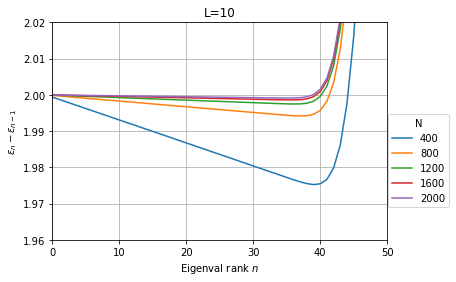

In [108]:
# Load data from output of FORTRAN program - varying N
Ns = [400,800,1200,1600,2000] 
eps_max = []
coeffs = []

for N in Ns:
    eigenval = np.genfromtxt('/Users/ale/QuantumComputingStuff/Ex04_marcomini/data/Eigenvals_N%.i_L10.txt' % N)
    th_val = np.array([(n+0.5) for n in np.arange(N)])*2
    eps_plot = np.diff(eigenval)#np.abs(eigenval-th_val)
    plt.plot(eps_plot, label=str(N))
    #eps_max.append([N-1, (eigenval[-1]-th_val[-1])/th_val[-1]])
    coeff = np.polyfit(np.log(np.arange(30)+1), np.log(eps_plot[:30]), 1)
    coeffs.append([coeff[0],coeff[1]])


eps_max = np.array(eps_max)
#plt.scatter(eps_max[:,0],eps_max[:,1], marker='x', color='0')
#coeff = np.polyfit(eps_max[:,0], np.log(eps_max[:,1]), 1)
#plt.plot(np.arange(max(Ns)), np.exp(np.arange(max(Ns))*coeff[0] + coeff[1]), ls='--', color='0')
#plt.xscale('log')
#plt.xscale('log')
#plt.yscale('log')
plt.title('L=10')
plt.ylabel('$\epsilon_{n} - \epsilon_{n-1}$')
plt.xlabel('Eigenval rank $n$')
plt.legend(bbox_to_anchor=(1.2,0.6), title='N')
plt.xlim([0,50])
plt.ylim([1.96,2.02])
plt.grid()
plt.show()
    

In [44]:
# Scaling coefficients in linear log-log plot
coeffs

[[2.2083169586319094, -5.414368499217888],
 [2.1870061708967765, -5.838640329507562],
 [2.177484178192028, -6.194392478972906],
 [2.1690047462370554, -6.762455639953046],
 [2.1653560249242405, -7.20585272104681],
 [2.163439133019808, -7.569074943320081],
 [2.1623043239756012, -7.8765846437441995],
 [2.161576018664538, -8.143168491151972],
 [2.1610803802855143, -8.378427447746306],
 [2.160727667479669, -8.588943083216519]]

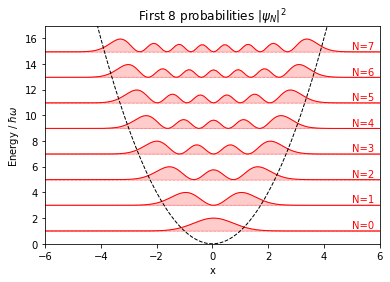

In [129]:
# Plot squared eigenfunctions
def normalize(pdf):
    return pdf/max(pdf)

K = 8
L = optimal_L(1000)
N = len(eigenval)
dx = 2*L/(N-1)
X = np.arange(N)*dx-L

for k in range(K):
    plt.plot(X,normalize(pdfs[k,:])+eigenval[k], lw = 1, color = 'r')
    plt.plot(X,np.ones(len(X))*eigenval[k], lw = 0.5, ls = ':', color ='r')
    plt.fill_between(X, eigenval[k], normalize(pdfs[k,:])+eigenval[k], color='r', alpha=0.2)
    plt.text(int(np.sqrt(eigenval[K]))+1,eigenval[k]+0.2,'N=%.i' % k, color='r')

plt.plot(X,X**2, ls='--', lw=1, color='0')
plt.ylim([0,eigenval[K]])
plt.xlim([-int(np.sqrt(eigenval[K]))-2,int(np.sqrt(eigenval[K]))+2])
plt.xlabel('x')
plt.ylabel('Energy / $\hbar\omega$')
plt.title('First %.i probabilities $|\psi_N|^2$' % K)
plt.savefig('PDFs_example')
plt.show()